In [1]:
# Also import other packages
# Pandas
import pandas as pd
# Plotnine (ggplot for Python)
from plotnine import *

To generate the required data table, use `.residuals().output.to_pandas()` on an ABM optimization object. An example of this can be found in the 09_complete_workflows/psf_optimizations.ipynb notebook

*NOTE* in the below example, normalized residual is calculated from the constant and proportional error. In the V2 version of ABM `'prediction'`, `'residual'`, `'normalized_residual'`, and `'log_likelihood'` are all outputs calculated directly using the `.residuals()` method

In [2]:
rdata = pd.read_csv('rdata.csv')
rdata['error'] = rdata.constant_error + rdata.proportional_error * rdata.prediction
rdata['normalized_residual'] = rdata.residual / rdata.error
rdata

,id,t,output,proportional_error,constant_error,measurement,prediction,residual,error,normalized_residual
0,0,172800,receptor_occupancy,0,2.217979,4.876369,0.003389,4.872980,2.217979,2.197036
1,1,172800,receptor_occupancy,0,2.217979,0.000000,0.009091,-0.009091,2.217979,-0.004099
2,2,172800,receptor_occupancy,0,2.217979,2.620207,0.024385,2.595822,2.217979,1.170354
3,3,172800,receptor_occupancy,0,2.217979,5.298750,0.065390,5.233360,2.217979,2.359517
4,4,172800,receptor_occupancy,0,2.217979,1.129469,0.175229,0.954239,2.217979,0.430229
5,5,172800,receptor_occupancy,0,2.217979,4.847354,0.468705,4.378648,2.217979,1.974161
6,6,172800,receptor_occupancy,0,2.217979,0.260030,1.247556,-0.987526,2.217979,-0.445237
7,7,172800,receptor_occupancy,0,2.217979,6.627115,3.278014,3.349101,2.217979,1.509978
8,8,172800,receptor_occupancy,0,2.217979,7.691022,8.334289,-0.643267,2.217979,-0.290024
9,9,172800,receptor_occupancy,0,2.217979,19.474665,19.608830,-0.134165,2.217979,-0.060490


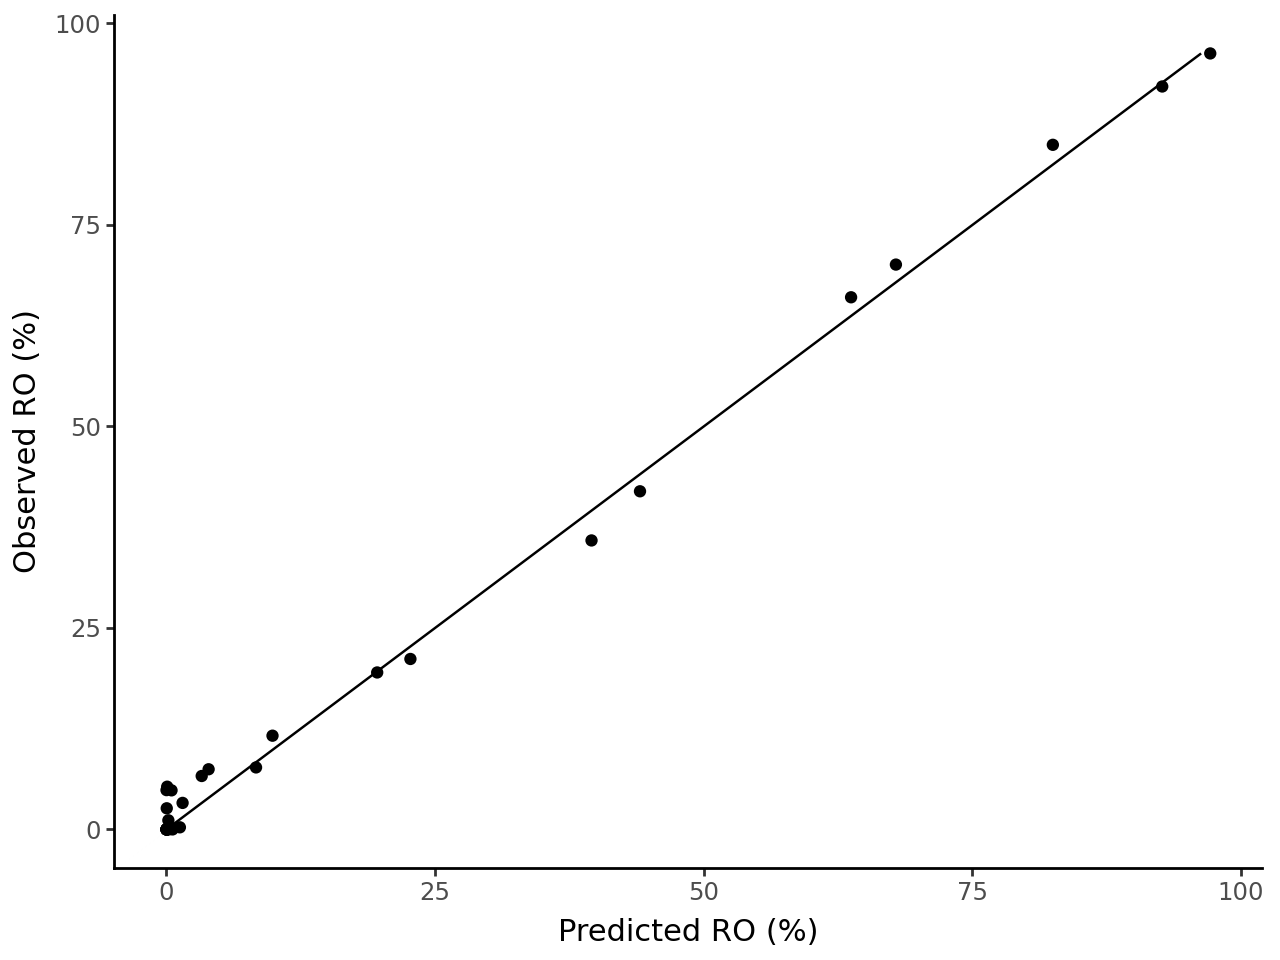

In [3]:
# Plot predicted vs. observed values from the optimization

(
    ggplot(data=rdata, mapping=aes(x = 'prediction', y = 'measurement')) +
    geom_point() +
    geom_line(mapping=aes(x='measurement', y='measurement')) +
    labs(x = 'Predicted RO (%)', y = 'Observed RO (%)') +
    theme_classic()
)

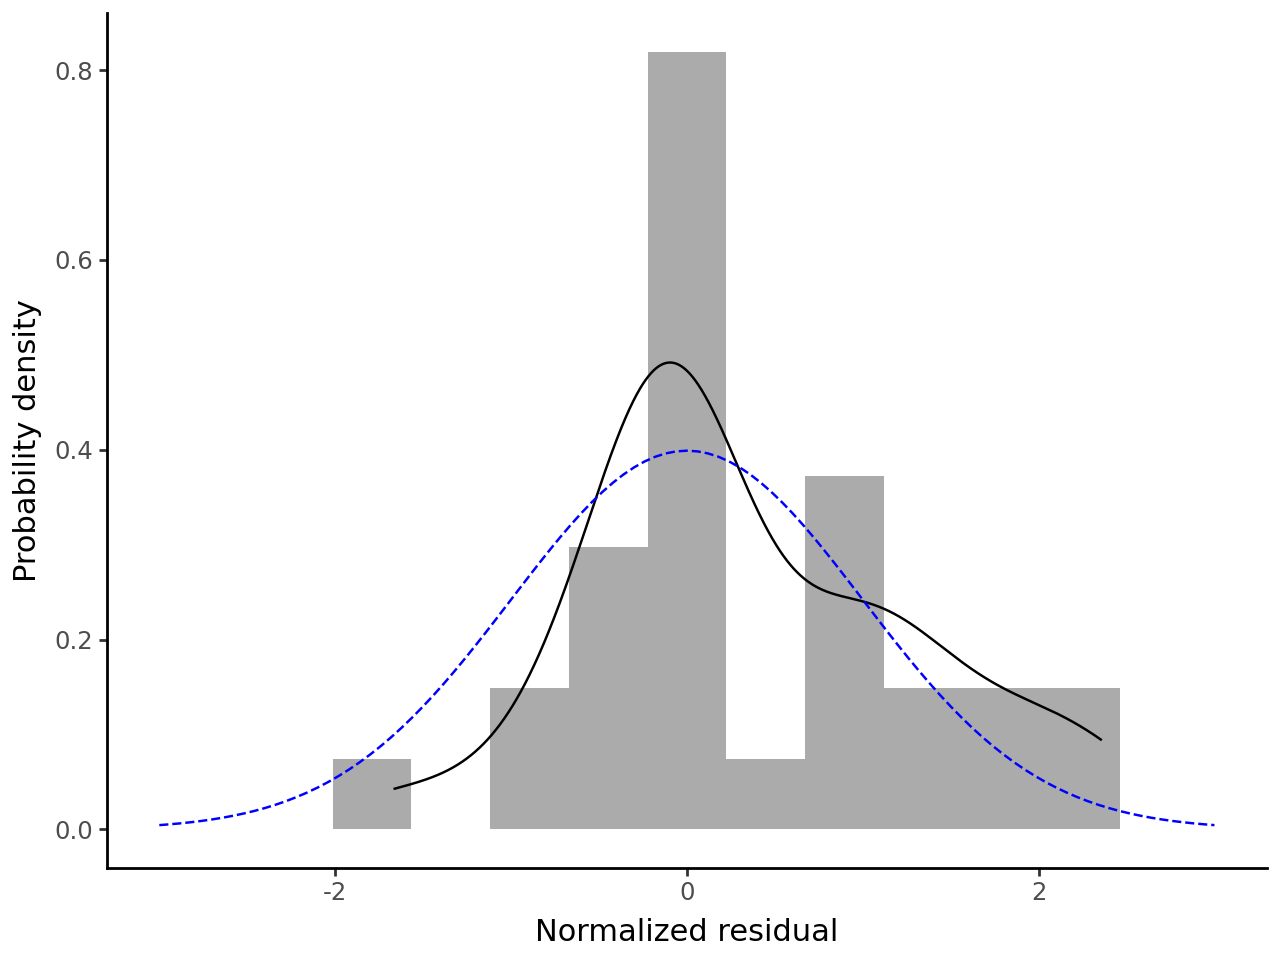

In [4]:
# Histogram of residuals
import scipy.stats as stats
(
    ggplot(data = rdata, mapping = aes(x='normalized_residual')) + 
    # Add histogram of normalized residuals
    geom_histogram(aes(y='..density..'), bins=10, alpha = 0.5) + 
    # Add PDF curve of normalized residuals
    geom_density(color = 'black') +
    # Add normal distribution for comparison
    stat_function(fun=stats.norm.pdf, xlim = [-3, 3], linetype = 'dashed', color = 'blue') +
    scale_x_continuous(name="Normalized residual") +
    scale_y_continuous(name="Probability density") +
    theme_classic()
)